In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

from fairpair import *

## Contained in Ranking (Giant Strongly Connected Component)

In [2]:
import multiprocessing
from workers import *

In [19]:
if __name__ == '__main__':
    pool = multiprocessing.Pool()
    contained = pool.map(get_representation, range(0,10))
    contained = [result for pool in contained for result in pool]
    contained = pd.DataFrame(contained, columns=['trial', 'iteration', 'share giant component', 'group'])
    contained

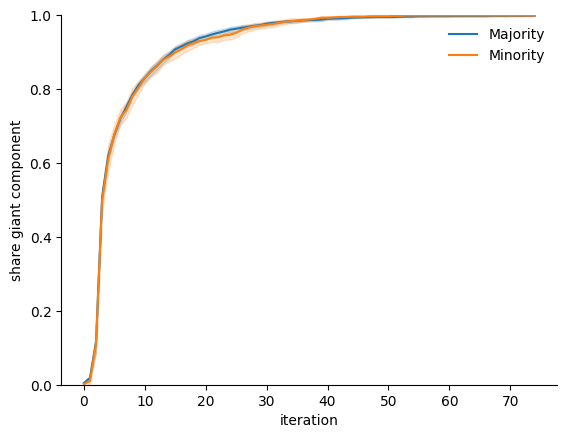

In [20]:
ax = sns.lineplot(contained, x='iteration', y='share giant component', hue='group', hue_order=['Majority', 'Minority'])
ax.legend(title=None, frameon=False)
ax.set(ylim=(0, 1))
sns.despine()

## Accuracy

In [36]:
if __name__ == '__main__':
    pool = multiprocessing.Pool()
    contained = pool.map(get_accuracy, range(0,10))
    contained = [result for pool in contained for result in pool]
    contained = pd.DataFrame(contained, columns=['trial', 'iteration', 'mean squared error', 'group'])
    contained

Strongly connected after 14 iterations.
Strongly connected after 15 iterations.
Strongly connected after 14 iterations.
Strongly connected after 16 iterations.
Strongly connected after 18 iterations.
Strongly connected after 19 iterations.
Strongly connected after 19 iterations.
Strongly connected after 19 iterations.
Strongly connected after 22 iterations.
Strongly connected after 24 iterations.


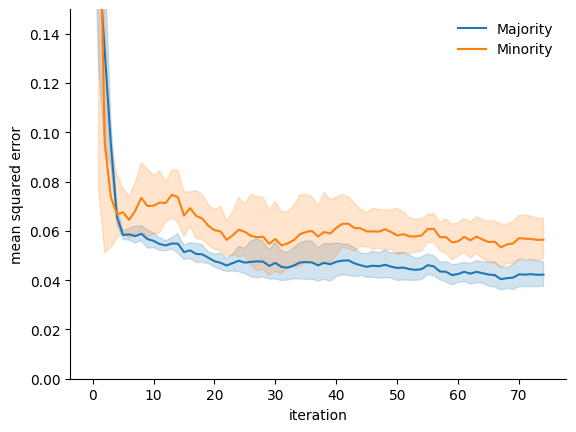

In [37]:
ax = sns.lineplot(contained, x='iteration', y='mean squared error', hue='group', hue_order=['Majority', 'Minority'])
ax.legend(title=None, frameon=False)
ax.set(ylim=(0, 0.15)) #ax.set(ylim=(0, 40000))
sns.despine()

## Star Graph Accuracy

In [5]:
from itertools import product
tasks = list(product(range(10), np.arange(0.1,1.01,0.05)))

if __name__ == '__main__':
    pool = multiprocessing.Pool()
    contained = pool.starmap(get_star_graph, tasks)
    contained = [result for pool in contained for result in pool]
    contained = pd.DataFrame(contained, columns=['trial', 'stariness', 'iteration', 'mean squared error'])
    contained

Strongly connected after 20 iterations.
Strongly connected after 23 iterations.
Strongly connected after 22 iterations.
Strongly connected after 27 iterations.
Strongly connected after 28 iterations.
Strongly connected after 30 iterations.
Strongly connected after 28 iterations.
Strongly connected after 34 iterations.
Strongly connected after 35 iterations.
Strongly connected after 41 iterations.
Strongly connected after 27 iterations.
Strongly connected after 37 iterations.
Strongly connected after 29 iterations.
Strongly connected after 25 iterations.
Strongly connected after 20 iterations.
Strongly connected after 38 iterations.
Strongly connected after 30 iterations.
Strongly connected after 19 iterations.
Strongly connected after 27 iterations.
Strongly connected after 37 iterations.
Strongly connected after 34 iterations.
Strongly connected after 45 iterations.
Strongly connected after 31 iterations.
Strongly connected after 38 iterations.
Strongly connected after 21 iterations.


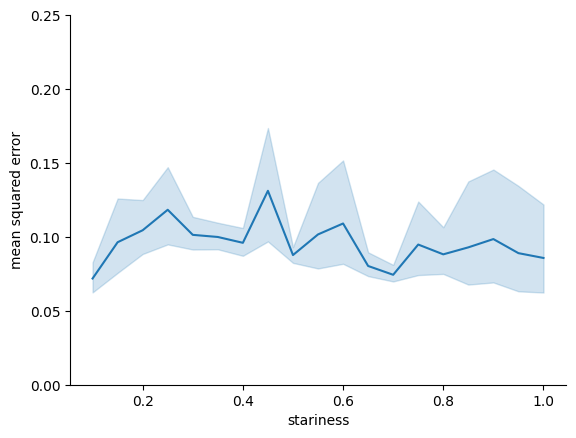

In [37]:
end_result = contained[contained.iteration == 40]
ax = sns.lineplot(end_result, x='stariness', y='mean squared error')
#ax.legend(title=None, frameon=False)
ax.set(ylim=(0, 0.25)) #ax.set(ylim=(0, 40000))
sns.despine()